<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 01 Data Cleaning - Missing Values Filling

### Riccardo Spolaor (864877)

</center>

### Controllo e filling Missing Values
Controllo quali feature presentano valori mancanti e procedo al loro filling.

In [1]:
%store -r
%store -z

In [2]:
dataframe.head()

,csvID,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


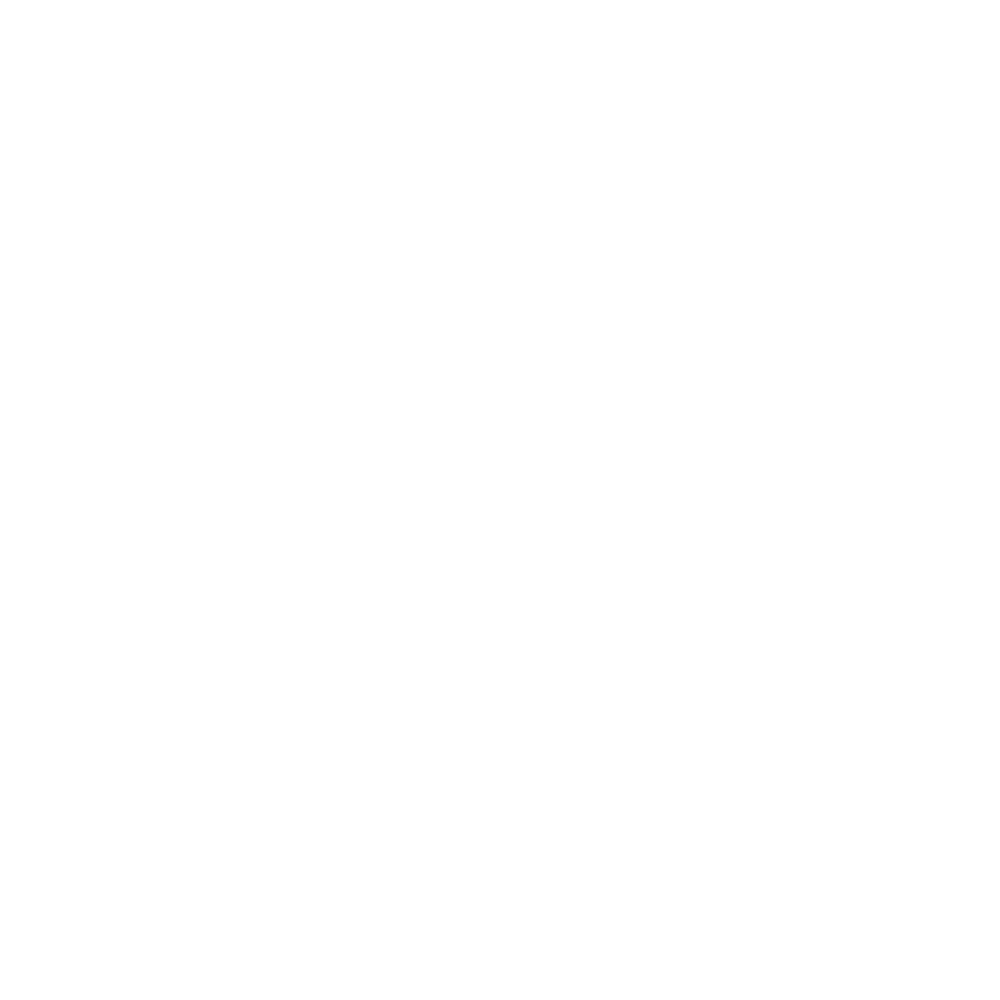

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Let's check how many missing values does each attribute have
def printNan():
    dictionary = {}
    for c in dataframe.columns:
        nan_sum = sum(dataframe[c].isna())
        if (nan_sum!=0): dictionary[c] = nan_sum
    shape = dataframe.shape[0]
    if len(dictionary) > 25:
        fig, ax = plt.subplots(figsize = (8,8))
    else:
        fig, ax = plt.subplots()
    ax.barh(np.arange(len(dictionary)), [v for k,v in dictionary.items()], zorder = 3, color = 'red')
    ax.set_yticks(np.arange(len(dictionary)))
    ax.set_yticklabels([k for k,v in dictionary.items()])
    fig.suptitle('Number of NaN Values per Feature')
    ax.set(xlabel = 'Number of NaNs', ylabel = 'Features containing NaNs')
    ax.xaxis.grid(zorder = 0)
    
    fig.show()
    
    #for key, value in dictionary.items():
    #    print(key, ': ', value, '/', shape)
        
def printRowsWithoutRanking():
    noBets = 0
    odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW', 'AvgW']
    odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL', 'AvgL']
    for i,r in dataframe.iterrows():
        if r[odds_W].isna().all() or r[odds_L].isna().all(): noBets += 1
    print('Rows without winner or loser bettings:', noBets)
    
printNan()

#printRowsWithoutRanking()

Come prima cosa procedo a correggere le feature riguardanti le scommesse dei bookmaker.

Rimuovo le righe che non hanno alcuna scommessa da parte dei bookmaker e sono prive delle feature che indicano la media delle scommesse per il vincitore e per il perdente (***AvgW*** e ***AvgL***).

Poi procedo riempiendo le feature ***AvgW*** e ***AvgL*** che presentano valori *NaN* rispettivamente con la media delle scommesse dei bookmaker per il vincitore e per il perdente.

Procedo riempiendo le feature ***MaxW*** e ***MaxL*** che presentano valori *NaN* rispettivamente con il massimo tra le scommesse dei bookmaker per il vincitore e per il perdente (considero pure ***AvgW*** e ***AvgL***).

Creo due nuove feature ***MinW*** e ***MinL*** che presentano rispettivamente il minimo valore tra le scommesse dei bookmaker per il vincitore e per il perdente (considero pure ***AvgW*** e ***AvgL***).

Infine elimino tutte le colonne del dataset riguardanti le scommesse dei singoli bookmaker.

In [4]:
odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW']
odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL']

print('Procedo eliminando le righe senza alcuna scommessa dei bookmaker:')

print('Righe prima dell\'eliminazione: ', dataframe.shape[0])
dataframe.dropna(subset = odds_W + ['AvgW'], axis=0, inplace= True, how = 'all')
dataframe.dropna(subset = odds_L + ['AvgL'], axis=0, inplace= True, how = 'all')
print('Righe dopo l\'eliminazione: ', dataframe.shape[0], '\n')

print('Procedo al filling di AvgW e AvgL:')
print('AvgW settati a NaN prima: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN prima: ',sum(dataframe['AvgL'].isna()))
dataframe['AvgW'].fillna(dataframe[odds_W].mean(axis=1), inplace = True)
dataframe['AvgL'].fillna(dataframe[odds_L].mean(axis=1), inplace= True)
print('AvgW settati a NaN dopo: ',sum(dataframe['AvgW'].isna()))
print('AvgL settati a NaN dopo: ',sum(dataframe['AvgL'].isna()), '\n')

print('Procedo al filling di MaxW e MaxL:')
print('MaxW settati a NaN prima: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN prima: ',sum(dataframe['MaxL'].isna()))
dataframe['MaxW'].fillna(dataframe[odds_W + ['AvgW']].max(axis=1), inplace = True)
dataframe['MaxL'].fillna(dataframe[odds_L + ['AvgL']].max(axis=1), inplace= True)
print('MaxW settati a NaN dopo: ',sum(dataframe['MaxW'].isna()))
print('MaxL settati a NaN dopo: ',sum(dataframe['MaxL'].isna()), '\n')

print('Creo le colonne MinW e MinL e droppo le scommesse singole dei bookmaker:')
dataframe['MinW'] = dataframe[odds_W + ['AvgW']].min(axis=1)
dataframe['MinL'] = dataframe[odds_L + ['AvgL']].min(axis=1)
dataframe.drop(odds_W + odds_L, axis = 1, inplace= True)

print(dataframe.columns)

dataframe = dataframe.reset_index(drop = True)

Procedo eliminando le righe senza alcuna scommessa dei bookmaker:
Righe prima dell'eliminazione:  51945
Righe dopo l'eliminazione:  51016 

Procedo al filling di AvgW e AvgL:
AvgW settati a NaN prima:  25662
AvgL settati a NaN prima:  25662
AvgW settati a NaN dopo:  0
AvgL settati a NaN dopo:  0 

Procedo al filling di MaxW e MaxL:
MaxW settati a NaN prima:  25662
MaxL settati a NaN prima:  25662
MaxW settati a NaN dopo:  0
MaxL settati a NaN dopo:  0 

Creo le colonne MinW e MinL e droppo le scommesse singole dei bookmaker:
Index(['csvID', 'ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court',
       'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'WPts', 'LPts', 'MaxW', 'MaxL', 'AvgW', 'AvgL',
       'MinW', 'MinL'],
      dtype='object')


<IPython.core.display.Javascript object>


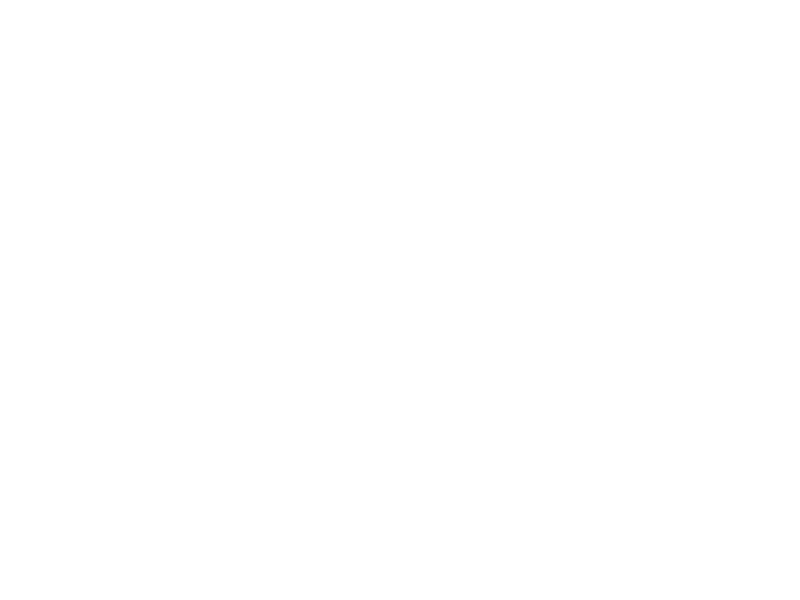

In [5]:
printNan()

Procedo a correggere le feature riguardanti il Rank dei giocatori (***WRank*** e ***LRank***).

Assegno ai valori del Ranking settati a *NaN* il valore  medio dei ranking (***WRank*** e ***LRank***) di quel giocatore, se questo valore non esiste elimino la riga.

Aggiungo le colonne ***WRankAdded*** e ***LRankAdded*** che assumono valori binari:
* 0 se il Rank era già presente;
* 1 se è stato inferito manualmente.

In [6]:
def getMeanFeatureOfPlayer(player, value):
    rankList = dataframe[dataframe['Winner'] == player]['W'+value].append(
        dataframe[dataframe['Loser'] == player]['L'+value])
    return rankList.mean(skipna = True)

def getPlayersMeanFeature (value):
    players = dataframe['Winner'].append(dataframe['Loser']).unique()
    return {x : getMeanFeatureOfPlayer(x,value) for x in players}
    
def assignFeatureToPlayers(value):
    playersMeanRank = getPlayersMeanFeature (value)
    meanW = dataframe[dataframe['W'+value].isna()]['Winner'].apply(lambda x: playersMeanRank[x])
    meanL = dataframe[dataframe['L'+value].isna()]['Loser'].apply(lambda x: playersMeanRank[x])
    dataframe['W'+value].fillna(meanW, inplace = True)
    dataframe['L'+value].fillna(meanL, inplace = True)

In [7]:
dataframe.insert(dataframe.columns.get_loc('WRank') + 1, column = 'WRankAdded', value = 0)
dataframe.loc[dataframe['WRank'].isna(), 'WRankAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LRank') + 1, column = 'LRankAdded', value = 0)
dataframe.loc[dataframe['LRank'].isna(), 'LRankAdded'] = 1

print('Filling di WRank e LRank:')
print('WRank settati a NaN prima: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN prima: ',sum(dataframe['LRank'].isna()))

assignFeatureToPlayers('Rank')

print('WRank settati a NaN dopo: ',sum(dataframe['WRank'].isna()))
print('LRank settati a NaN dopo: ',sum(dataframe['LRank'].isna()), '\n')

print('Dropping di righe  con WRank e LRank ancora settate a NaN:')
print('Righe prima dell\'eliminazione: ', dataframe.shape[0])

dataframe.dropna(subset = ['WRank'], axis=0, inplace= True)
dataframe.dropna(subset = ['LRank'], axis=0, inplace= True)

print('Righe dopo l\'eliminazione: ', dataframe.shape[0])

dataframe = dataframe.reset_index(drop = True)

Filling di WRank e LRank:
WRank settati a NaN prima:  18
LRank settati a NaN prima:  99
WRank settati a NaN dopo:  1
LRank settati a NaN dopo:  33 

Dropping di righe  con WRank e LRank ancora settate a NaN:
Righe prima dell'eliminazione:  51016
Righe dopo l'eliminazione:  50982


<IPython.core.display.Javascript object>


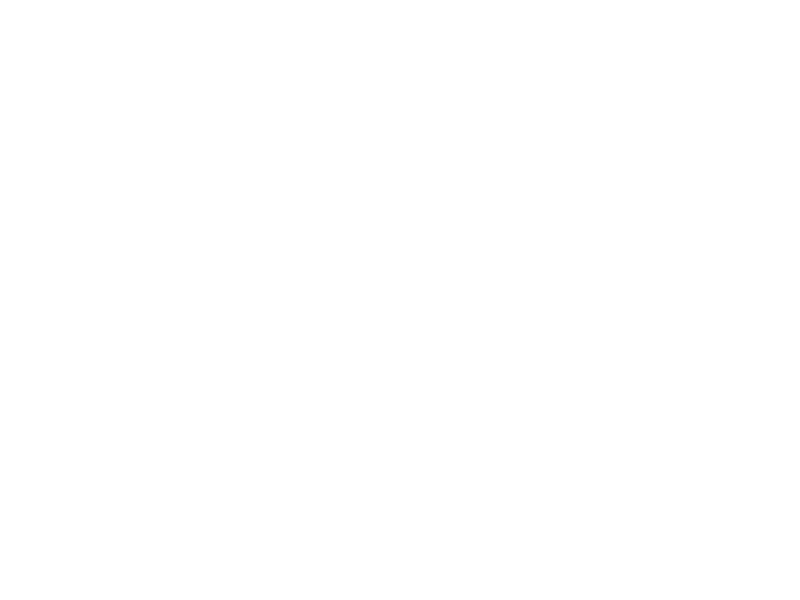

In [8]:
printNan()

Procedo a correggere le feature riguardanti i Punti dei giocatori (***WPts*** e ***LPts***).

Dato che i Punti determinano il Rank dei giocatori, controllo la relazione tra essi e ***WRank*** e ***LRank***

<IPython.core.display.Javascript object>


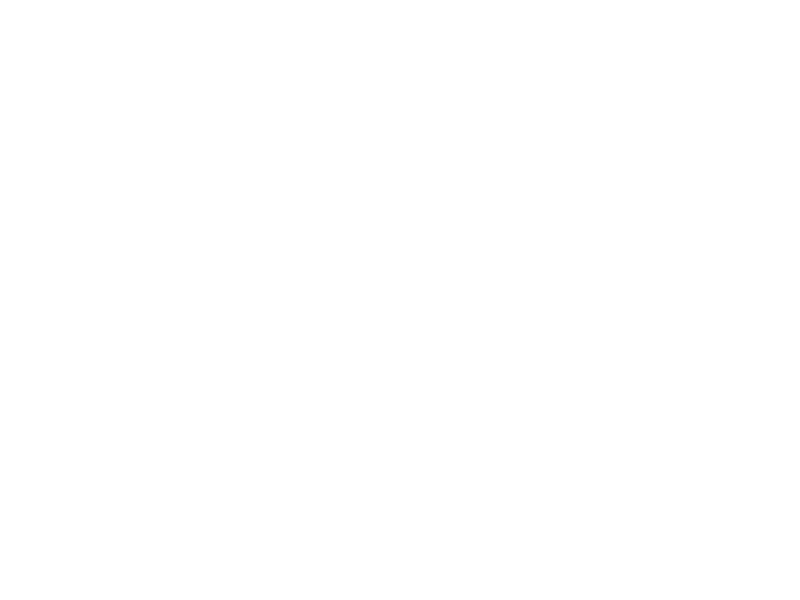

In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
fig.suptitle('Players Points-Rank Relation')
ax[0].scatter(dataframe['WRank'], dataframe['WPts'], color = 'blue', alpha=0.3)
ax[1].scatter(dataframe['LRank'], dataframe['LPts'], color = 'red', alpha=0.3)
ax[0].set(xlabel = 'WRank', ylabel = 'WPts')
ax[1].set(xlabel = 'LRank', ylabel = 'LPts')
ax[0].grid()
ax[1].grid()
fig.subplots_adjust(hspace = 0.5)
fig.show()

Sembra che ***LRank*** e ***WRank*** siano quadraticamente correlati a ***LPts*** e ***WPts***.

Procedo ad utilizzare un Albero di Regressione che dovrebbe adattarsi meglio a dati non correlati linearmente.
Per determinare l'accuratezza della predizione controllo la *Radice dello Scarto Quadratico Medio (RMSE)* del dataset suddiviso in Train Validation e Test.

<IPython.core.display.Javascript object>


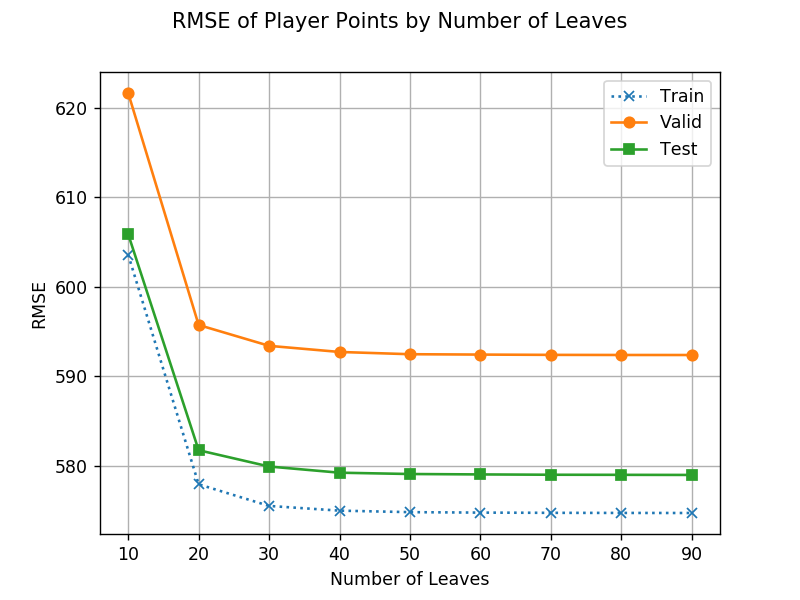

In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
import math, statistics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                              l_min=10, l_max=100, l_step=10):

    errors = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_err =  math.sqrt(mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train)))
        valid_err =  math.sqrt(mean_squared_error(y_true=y_valid, y_pred=dt.predict(X_valid)))
        test_err  =  math.sqrt(mean_squared_error(y_true=y_test, y_pred=dt.predict(X_test)))

        errors += [ [max_leaves, train_err, valid_err, test_err] ]

    errors = np.array(errors)
    
    return errors

X = dataframe[dataframe['WPts'].notna()]['WRank'].append(dataframe[dataframe['LPts'].notna()]['LRank'])
y = dataframe[dataframe['WPts'].notna()]['WPts'].append(dataframe[dataframe['LPts'].notna()]['LPts'])

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

X_train_0, X_test, y_train_0, y_test = train_test_split( X, y, 
                                                         test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_0, y_train_0, 
                                                         test_size=0.25)


errors = accuracies_vary_max_leaves(X_train, X_valid, X_test, 
                           y_train, y_valid, y_test)

fig, ax = plt.subplots()
fig.suptitle('RMSE of Player Points by Number of Leaves')
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Valid")
ax.plot(errors[:,0], errors[:,3], "s-", label="Test")
ax.set_ylabel("RMSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend()
fig.show()

La *Radice dello Scarto Quadratico Medio* risulta essere troppo alta, quindi i Punti dei giocatori non sono direttamente inferibili dal Rank dei giocatori.

Procedo a correggere le feature mancanti riguardanti i Punti dei giocatori (***WPts*** e ***LPts***) in modo analogo a quanto ho fatto per ***WRank*** e ***LRank***.

Aggiungo anche in questo caso le colonne ***WPtsAdded*** e ***LPtsAdded*** che assumono valori binari:

* 0 se i Punti erano già presenti;
* 1 se sono stati inferiti manualmente.


In [11]:
dataframe.insert(dataframe.columns.get_loc('WPts') + 1, column = 'WPtsAdded', value = 0)
dataframe.loc[dataframe['WPts'].isna(), 'WPtsAdded'] = 1
dataframe.insert(dataframe.columns.get_loc('LPts') + 1, column = 'LPtsAdded', value = 0)
dataframe.loc[dataframe['LPts'].isna(), 'LPtsAdded'] = 1

print('Filling di WPts e LPts:')
print('WPts settati a NaN prima: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN prima: ',sum(dataframe['LPts'].isna()))
            
assignFeatureToPlayers('Pts')

print('WPts settati a NaN dopo: ',sum(dataframe['WPts'].isna()))
print('LPts settati a NaN dopo: ',sum(dataframe['LPts'].isna()), '\n')

print('Dropping di righe  con WRank e LRank ancora settate a NaN:')
print('Righe prima dell\'eliminazione: ', dataframe.shape[0])

dataframe.dropna(subset = ['WPts'], axis=0, inplace= True)
dataframe.dropna(subset = ['LPts'], axis=0, inplace= True)

print('Righe dopo l\'eliminazione: ', dataframe.shape[0])

dataframe = dataframe.reset_index(drop = True)

Filling di WPts e LPts:
WPts settati a NaN prima:  12474
LPts settati a NaN prima:  12520
WPts settati a NaN dopo:  1645
LPts settati a NaN dopo:  2313 

Dropping di righe  con WRank e LRank ancora settate a NaN:
Righe prima dell'eliminazione:  50982
Righe dopo l'eliminazione:  47475


<IPython.core.display.Javascript object>


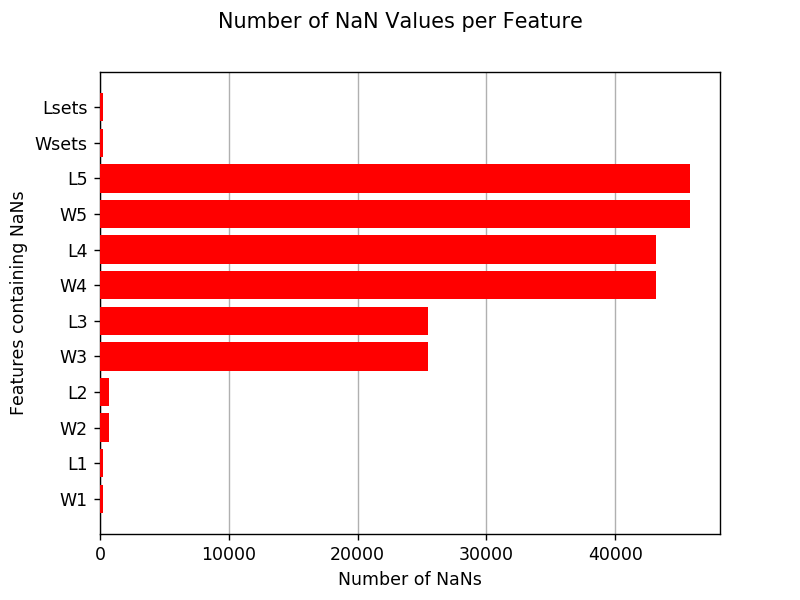

In [12]:
printNan()

Per quanto riguarda i valori *NaN* delle feature riguardanti i Set vinti dal vincitore e dal perdente (***Wsets*** e ***Lsets***) e i valori delle feature riguardanti i Punti per ogni Set dei due giocatori (***W1***, ***W2***, ***W3***, ***W4***, ***W5*** e ***L1***, ***L2***, ***L3***, ***L4***, ***L5***):
* Controllo solo i valori *NaN* di ***Wsets***, ***Lsets***, ***W1***, ***L1***, ***W2***, ***L2*** per tutte le partite e di ***W3***, ***L3*** solo per le partite al meglio di 5 (***Best Of*** = 5);
* Controllo solo le partite portate a termine (***Comment*** = *'Completed'*);
* Elimino le righe corrispondenti a questi match;
* Setto tutti i valori *NaN* rimanenti delle feature a 0.

In [13]:
def dropCompletedNan (feature):
    if feature == 'sets':
        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL o 0.\n')
        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['W'+feature] == 0]).drop_duplicates()
        noDf = noDf.append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()
    else:
        print ('\nCommenti delle partite in cui W'+feature, ' e L'+feature, ' è NULL.\n')
        noDf = dataframe[dataframe['W'+feature].isna()].append(dataframe[dataframe['L'+feature].isna()]).drop_duplicates()
        
    if feature == '3':
        print ('Consideriamo solo le partite al meglio di 5.\n')
        noDf = noDf[noDf['Best of'] == 5]
    
    print(noDf['Comment'].unique())
        
    if noDf[noDf['Comment'] == 'Completed'].shape[0] > 0:
        print ('\nControlliamo solo i casi in cui la partita è stata completata.\n')

        print(noDf[noDf['Comment'] == 'Completed'][['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5',
                                                    'Wsets','Lsets', 'Best of']])

        print('\nScarto le righe incomplete.\n')

        print('Righe prima della modifica: ', dataframe.shape[0])

        dataframe.drop(noDf[noDf['Comment'] == 'Completed'].index.values, axis = 0, inplace = True)

        print('Righe dopo la modifica: ', dataframe.shape[0])
    else:
        print ('\nEsistono solo i casi in cui la partita non è stata completata, non scartiamo nessuna riga.\n')
        
    print('\n\n')

In [14]:
dropCompletedNan('sets')
dropCompletedNan('1')
dropCompletedNan('2')
dropCompletedNan('3')
dataframe.reset_index(drop = True, inplace = True)


Commenti delle partite in cui Wsets  e Lsets  è NULL o 0.

['Walkover' 'Retired' 'Completed' 'Disqualified']

Controlliamo solo i casi in cui la partita è stata completata.

        W1   W2  W3  W4  W5   L1   L2  L3  L4  L5  Wsets  Lsets  Best of
11890  NaN  NaN NaN NaN NaN  NaN  NaN NaN NaN NaN    NaN    NaN      5.0
30841  6.0  7.0 NaN NaN NaN  3.0  6.0 NaN NaN NaN    0.0    0.0      3.0
35873  1.0  NaN NaN NaN NaN  2.0  NaN NaN NaN NaN    0.0    0.0      3.0
47072  6.0  3.0 NaN NaN NaN  7.0  4.0 NaN NaN NaN    0.0    1.0      3.0

Scarto le righe incomplete.

Righe prima della modifica:  47475
Righe dopo la modifica:  47471




Commenti delle partite in cui W1  e L1  è NULL.

['Walkover' 'Completed' 'Retired']

Controlliamo solo i casi in cui la partita è stata completata.

       W1  W2  W3  W4  W5  L1  L2  L3  L4  L5  Wsets  Lsets  Best of
20164 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN    2.0    0.0      3.0

Scarto le righe incomplete.

Righe prima della modifica:  47471
Righe do

<IPython.core.display.Javascript object>


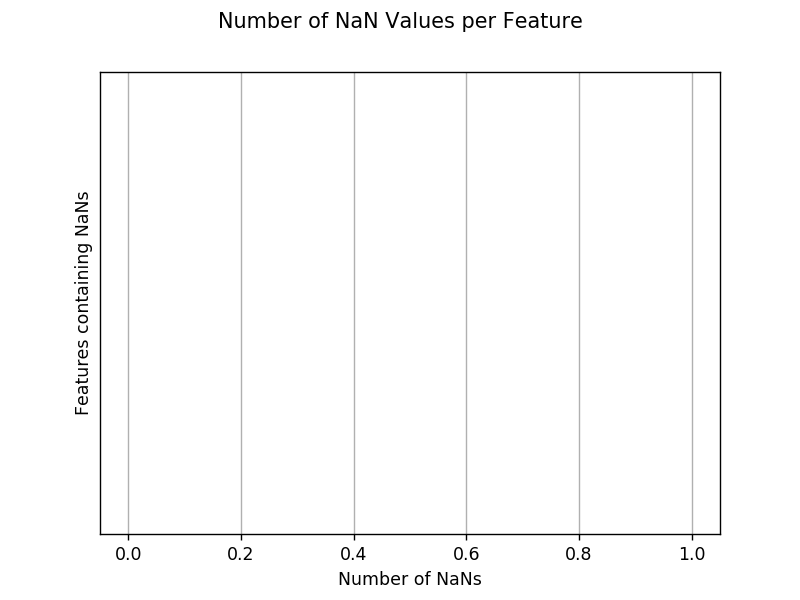

In [15]:
dataframe.loc[:,'W1':'Lsets'] = dataframe.loc[:,'W1':'Lsets'].fillna(0)

printNan()

In [23]:
%store dataframe

Stored 'dataframe' (DataFrame)


In [17]:
%store

Stored variables and their in-db values:
dataframe             ->        csvID   ATP  Location            Tournament
